In [316]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Stock prediction using Linear regression**

In [317]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

**Price pridtion using Linear regression Model**

In [318]:
df = pd.read_csv('/kaggle/input/adaniports610/ADANIPORTS.csv')

In [319]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [320]:
start_date = '2007-11-27'
end_date = '2020-11-27'

fill = (df ['Date']>=start_date) & (df ['Date']<=end_date)
df = df .loc[fill]

In [321]:
x=df[['Open','High','Low','Volume']].values
y=df['Close'].values

In [322]:
print(len(df))


3220


In [323]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [324]:
regressor=LinearRegression()


In [325]:
regressor.fit(x_train,y_train)

LinearRegression()

In [326]:
print(regressor.coef_)
print(regressor.intercept_)

[-4.69900567e-01  7.44897389e-01  7.20881047e-01  1.19213797e-07]
0.6098231506611


In [327]:
predicted=regressor.predict(x_test)
print(predicted)

[ 603.04062162  154.73890008  276.90102053  128.14304243  179.98895591
  281.19794647  897.35760429  157.39152748  361.17796859  135.09601062
  400.48387284  287.32905194  329.39539063  131.51573155  592.22817574
  401.96028274  767.76383047  691.18467108  351.9300062   146.33863553
  289.74838593  641.99611734 1059.77041951  320.11376348  313.07667004
  142.81096083  181.77806394  144.71018367  606.17688165  720.14805189
  345.78567092  114.59301647  163.54496596  401.96441962  136.58558081
  138.59183933  400.46468957  148.15361962  586.00496195  139.85914981
  561.33890018  372.83577432  391.58564843  414.01264767  689.56934703
  373.39386694  355.57906099  358.6758533   298.60401718  399.84412204
  386.00886633  172.46096511  398.1728401   261.37816965  143.28530709
  156.05583619  162.90628399  366.81066656  739.30278891  364.89371309
  387.57621385  380.4642749   388.04173436  309.60499647  812.94137988
  160.66176809  386.18818054  395.8103581   336.26739939  164.91224835
  316.

In [328]:
dataframe=pd.DataFrame({'Actaul':y_test.flatten(),'predicted':predicted.flatten()})
dataframe.head(4)

,Actaul,predicted
0,601.35,603.040622
1,154.30,154.738900
2,273.10,276.901021
3,127.95,128.143042


In [329]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
# Printout relevant metrics
#print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, predicted))
print("Mean squared Error:",metrics.mean_squared_error(y_test, predicted))
print("root mean squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 2.6161618160623044
Mean squared Error: 22.412356302359942
root mean squared Error: 4.734169019200723


<AxesSubplot:>

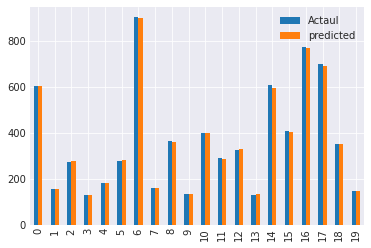

In [330]:
graph=dataframe.head(20)
graph.plot(kind="bar")

In [331]:
actual_price=df.tail(1)
actual_price

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3219,2020-11-27,ADANIPORTS,EQ,410.15,411.0,416.0,408.2,412.0,411.55,411.67,10593353,4.360993e+14,103550.0,4012544,0.3788


In [332]:
#Fine tuning of regressor

# idx = range(len(df))  # Set of indices for the whole dataset
# test_idx = [0, 50, 100]      # Choose 3 of them, arbitrarily, that will help
#                              # build a test set
# train_idx = [i for i in idx if i not in test_idx]

# from sklearn.model_selection import PredefinedSplit
# split_index = [-1 if x in train_idx else 0 for x in range(X_train.shape[0])]
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# param_distribs = {
#         'n_estimators': randint(low=5, high=200),
#         'max_depth': randint(low=1, high=3),
#     }

# lgbm_srch = LinearRegression()
# pds = PredefinedSplit(test_fold = split_index)

# rnd_search = RandomizedSearchCV(lgbm_srch, param_distributions=param_distribs,
#                                 n_iter=20, cv=pds, scoring='neg_mean_squared_error')

# rnd_search.fit(X_train, y_train)
# performance(log_test_prices,rnd_search.best_estimator_.predict(test_data))

**Price pridtion using SVR Model**

In [333]:
df=df.head(len(df)-1)

days = list()
adj_close_prices = list()

df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']


In [334]:
for day in df_days:
    days.append( [int(day.split('-')[2])] )

In [335]:
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [336]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

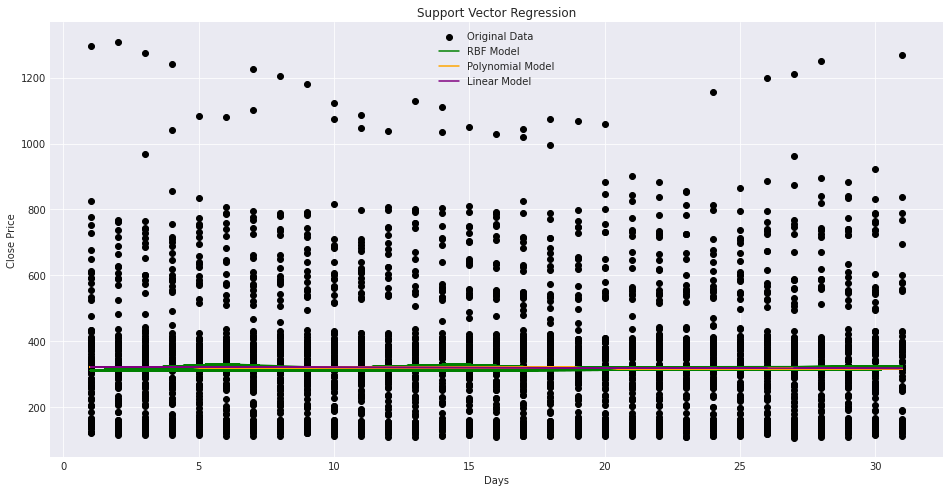

In [337]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [338]:
day=[[30]]
print('The RBF SVR predicted:',rbf_svr.predict(day ))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [312.60003491]
The Linear SVR predicted: [318.]
The Polynomial SVR predicted: [316.43559133]


In [339]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test and predicted are defined
rmse = np.sqrt(mean_squared_error(y_test, predicted))

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Calculate Percentage RMSE
prmse = (rmse / target_range) * 100

print("Percentage RMSE:", prmse)


Percentage RMSE: 0.39896924146306456
